## Data Workbook

In [3]:
# importing libraries
import pandas as pd
import numpy as np
#from sodapy import Socrata
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import urllib.parse
import json
from urllib.request import urlopen
import requests # library to handle requests
from datetime import datetime



### How to set up Conda environment for app

* step 1: Create a text file with all exclusive programs to run (file saved in profile folder)
* step 2: Open Anaconda Prompt and create new environment

### prompt code per line
* conda create -n test_env 
* conda activate test_env
* conda install pip
* pip3 install -r shiny_requirements.txt

* step 3: Open VSStudio and project folder
Create app.py file. Open the Command Palette (Ctrl+Shift+P), type Python: Select Interpreter, and hit Enter. A list of available interpreters will appear. Select the one that corresponds to your Anaconda environment.

* Step 4: ready for deployment
pip install rsconnect-python

rsconnect add --account sustainabu --name sustainabu --token A8048C7493B21A8E675D227509A2AECF --secret YwLlHKwTgxqNLvIhXdthKuitl0QO3uaA3imbHeso

rsconnect deploy shiny /path/to/app --name <NAME> --title my-app

rsconnect deploy shiny "C:\Users\anaye\OneDrive\Documents\GitHub\OpenDataNYC\NYCHateCrime" --name sustainabu --title HateNotOkay

* if program is seaborn not loading
pip3 install seaborn

In [6]:
        #x_coordinate_state_plane,
        #y_coordinate_state_plane,


# query parameter as a string
query = """
    SELECT 
        created_date,
        closed_date,
        agency,
        agency_name,
        complaint_type,
        descriptor,
        location_type,
        incident_zip,
        incident_address,
        street_name, 
        cross_street_1,
        cross_street_2,
        address_type,
        city,
        status,
        due_date,
        resolution_description,
        resolution_action_updated_date,
        community_board,
        open_data_channel_type as open_data_type,
        vehicle_type,
        latitude,
        longitude,
        location,
    WHERE
        created_date > 2024-05-01T00:00:00.000
        agency == 'NYPD'
    LIMIT
        10000
    """

# bqiq-cu78 is the data url for openData

url=f'https://data.cityofnewyork.us/resource/v7gg-i7xs.json?$query={query}'
data= requests.get(url).json()
df=pd.DataFrame(data)
print(df.shape)
df.head(5)

(10000, 41)


,descriptor,incident_zip,created_date,location,city,cross_street_2,park_facility_name,intersection_street_1,landmark,agency_name,...,bridge_highway_name,bridge_highway_segment,closed_date,resolution_description,taxi_pick_up_location,facility_type,bridge_highway_direction,due_date,road_ramp,taxi_company_borough
0,Other (complaint details),11378,2024-09-17T01:49:29.000,"{'latitude': '40.73130183676223', 'human_addre...",MASPETH,63 STREET,Unspecified,53 AVENUE,64 STREET,New York City Police Department,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Engine Idling,11372,2024-09-17T01:47:56.000,"{'latitude': '40.752496341620585', 'human_addr...",JACKSON HEIGHTS,35 AVENUE,Unspecified,34 AVENUE,78 STREET,New York City Police Department,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Posted Parking Sign Violation,11372,2024-09-17T01:46:22.000,"{'latitude': '40.752496341620585', 'human_addr...",JACKSON HEIGHTS,35 AVENUE,Unspecified,34 AVENUE,78 STREET,New York City Police Department,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Banging/Pounding,11368,2024-09-17T01:43:58.000,"{'latitude': '40.73698201773687', 'human_addre...",CORONA,97 STREET,Unspecified,96 STREET,57 AVENUE,New York City Police Department,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Use Indoor,11365,2024-09-17T01:35:12.000,"{'latitude': '40.72993160457863', 'human_addre...",FRESH MEADOWS,160 STREET,Unspecified,71 AVENUE,PARK AVENUE,New York City Police Department,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.city.value_counts()

city
JAMAICA                966
ASTORIA                672
FLUSHING               580
CORONA                 516
RIDGEWOOD              471
FRESH MEADOWS          454
LONG ISLAND CITY       388
ELMHURST               343
JACKSON HEIGHTS        306
WOODSIDE               303
SOUTH OZONE PARK       298
QUEENS                 295
FOREST HILLS           292
SOUTH RICHMOND HILL    280
OZONE PARK             264
FAR ROCKAWAY           258
MASPETH                257
EAST ELMHURST          228
WOODHAVEN              222
RICHMOND HILL          167
QUEENS VILLAGE         163
MIDDLE VILLAGE         159
REGO PARK              156
SPRINGFIELD GARDENS    132
COLLEGE POINT          131
BAYSIDE                128
HOWARD BEACH           110
WHITESTONE             106
SAINT ALBANS           102
SUNNYSIDE              100
HOLLIS                  91
ROSEDALE                70
CAMBRIA HEIGHTS         68
ARVERNE                 57
LITTLE NECK             56
OAKLAND GARDENS         54
KEW GARDENS            

In [10]:
df.agency.value_counts()

agency
NYPD     5955
DSNY      919
HPD       718
DOT       661
DEP       524
DPR       453
DOB       253
DOHMH     209
DHS        97
TLC        94
DCWP       61
EDC        54
DOE         2
Name: count, dtype: int64

In [12]:
df.tail(5)

,descriptor,incident_zip,created_date,location,city,cross_street_2,park_facility_name,intersection_street_1,landmark,agency_name,...,bridge_highway_name,bridge_highway_segment,closed_date,resolution_description,taxi_pick_up_location,facility_type,bridge_highway_direction,due_date,road_ramp,taxi_company_borough
9995,Trash,11103,2024-09-13T07:30:28.000,"{'latitude': '40.760847201348504', 'human_addr...",ASTORIA,42 STREET,Unspecified,41 STREET,31 AVENUE,Department of Sanitation,...,NaN,NaN,2024-09-13T12:15:39.000,The Department of Sanitation cleaned the locat...,NaN,NaN,NaN,NaN,NaN,NaN
9996,Bicycle Chained to Tree,11103,2024-09-13T07:29:01.000,"{'latitude': '40.760847201348504', 'human_addr...",ASTORIA,42 STREET,Unspecified,41 STREET,31 AVENUE,Department of Parks and Recreation,...,NaN,NaN,NaN,NYC Parks reviewed this request and will visit...,NaN,NaN,NaN,NaN,NaN,NaN
9997,Noise: Construction Equipment (NC1),11417,2024-09-13T07:29:00.000,"{'latitude': '40.668791981999554', 'human_addr...",OZONE PARK,N CONDUIT AVE,Unspecified,NaN,NaN,Department of Environmental Protection,...,NaN,NaN,NaN,NaN,NaN,N/A,NaN,NaN,NaN,NaN
9998,Posted Parking Sign Violation,11377,2024-09-13T07:28:52.000,"{'latitude': '40.73751406020878', 'human_addre...",WOODSIDE,50 AVENUE,Unspecified,49 AVENUE,66 STREET,New York City Police Department,...,NaN,NaN,2024-09-13T12:03:33.000,The Police Department responded to the complai...,NaN,NaN,NaN,NaN,NaN,NaN
9999,Plate Condition - Noisy,11375,2024-09-13T07:27:12.000,"{'latitude': '40.71652996688692', 'human_addre...",FOREST HILLS,KESSEL STREET,Unspecified,JUNO STREET,SELFRIDGE STREET,Department of Transportation,...,NaN,NaN,2024-09-13T09:48:48.000,The Department of Transportation inspected the...,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
        #x_coordinate_state_plane,
        #y_coordinate_state_plane,


# query parameter as a string
query = """
    SELECT 
        created_date,
        closed_date,
        agency,
        complaint_type,
        descriptor,
        location_type,
        incident_zip,
        incident_address,
        street_name, 
        cross_street_1,
        cross_street_2,
        address_type,
        city,
        status,
        due_date,
        resolution_description,
        resolution_action_updated_date,
        community_board,
        open_data_channel_type as open_data_type,
        vehicle_type,
        latitude,
        longitude,
        location
    WHERE
        created_date > '2024-05-01T00:00:00.000'
        AND agency == 'NYPD'
    LIMIT
        300000
    """

# bqiq-cu78 is the data url for openData

url=f'https://data.cityofnewyork.us/resource/v7gg-i7xs.json?$query={query}'
data= requests.get(url).json()
df2=pd.DataFrame(data)
print(df2.shape)
df2.tail(5)

(191687, 22)


,incident_zip,descriptor,created_date,location,city,cross_street_2,latitude,open_data_type,incident_address,cross_street_1,...,agency,longitude,complaint_type,street_name,status,address_type,resolution_action_updated_date,vehicle_type,closed_date,resolution_description
191682,11378,Commercial Overnight Parking,2024-05-01T00:07:17.000,"{'latitude': '40.721502273064004', 'human_addr...",MASPETH,60 AVENUE,40.721502273064004,PHONE,59-74 68 STREET,59 DRIVE,...,NYPD,-73.89409120379891,Illegal Parking,68 STREET,Closed,ADDRESS,2024-05-01T03:55:26.000,NaN,2024-05-01T03:55:22.000,The Police Department responded to the complai...
191683,11385,Loud Music/Party,2024-05-01T00:04:48.000,"{'latitude': '40.70149461166943', 'human_addre...",NaN,SENECA AVENUE,40.70149461166943,PHONE,PUTNAM AVENUE,PUTNAM AVENUE,...,NYPD,-73.90546554217497,Noise - Commercial,PUTNAM AVENUE,Closed,INTERSECTION,2024-05-01T00:42:54.000,NaN,2024-05-01T00:42:51.000,The Police Department responded to the complai...
191684,11421,No Access,2024-05-01T00:01:34.000,"{'latitude': '40.689908507178174', 'human_addr...",WOODHAVEN,88 ROAD,40.689908507178174,ONLINE,88-02 80 STREET,88 AVENUE,...,NYPD,-73.8616377162125,Blocked Driveway,80 STREET,Closed,ADDRESS,2024-05-01T00:47:38.000,NaN,2024-05-01T00:47:34.000,The Police Department issued a summons in resp...
191685,11385,Banging/Pounding,2024-05-01T00:01:07.000,"{'latitude': '40.70500346596463', 'human_addre...",RIDGEWOOD,SENECA AVENUE,40.70500346596463,ONLINE,1711 HARMAN STREET,CYPRESS AVENUE,...,NYPD,-73.91378488668434,Noise - Residential,HARMAN STREET,Closed,ADDRESS,2024-05-01T00:43:23.000,NaN,2024-05-01T00:43:18.000,The Police Department responded to the complai...
191686,11421,Banging/Pounding,2024-05-01T00:00:48.000,"{'latitude': '40.68805754694449', 'human_addre...",WOODHAVEN,87 STREET,40.68805754694449,PHONE,86-13 91 AVENUE,86 STREET,...,NYPD,-73.85635543843172,Noise - Residential,91 AVENUE,Closed,ADDRESS,2024-05-01T00:39:31.000,NaN,2024-05-01T00:39:27.000,The Police Department responded to the complai...


In [8]:
df2.city.value_counts()
df2.query("complaint_type=='Illegal Parking'").descriptor.value_counts()
#Noise - Residential
df2.query("complaint_type=='Noise - Residential'").descriptor.value_counts()

descriptor
Loud Music/Party    23822
Banging/Pounding     7503
Loud Talking         2307
Loud Television       516
Name: count, dtype: int64

In [42]:
df2.open_data_type.value_counts()

open_data_type
ONLINE     80956
MOBILE     51492
PHONE      43600
UNKNOWN      113
Name: count, dtype: int64

In [44]:
df2.complaint_type.value_counts()

# Noise= ["Noise - Residential","Noise - Street/Sidewalk","Noise - Commercial","Noise - Vehicle","Noise - Park","Noise - House of Worship"
# Public Nuisance= ["Abandoned Vehicle","Illegal Fireworks","Encampment","Drinking","Panhandling","Urinating in Public","",
# Public Safety= ["Disorderly Youth,"Animal-Abuse","Drug Activity","","",

complaint_type
Illegal Parking                58613
Noise - Residential            31324
Blocked Driveway               26675
Noise - Street/Sidewalk        13647
Abandoned Vehicle              11269
Drug Activity                   9741
Noise - Commercial              5397
Noise - Vehicle                 4637
Traffic                         3374
Non-Emergency Police Matter     2928
Illegal Fireworks               2088
Encampment                      1575
Noise - Park                    1544
Animal-Abuse                     923
Drinking                         887
Panhandling                      883
Urinating in Public              211
Bike/Roller/Skate Chronic        188
Graffiti                         118
Noise - House of Worship         106
Disorderly Youth                  17
Posting Advertisement             13
Squeegee                           3
Name: count, dtype: int64

In [46]:
df2.descriptor.value_counts()


descriptor
Loud Music/Party                  37820
No Access                         18501
Blocked Hydrant                   16802
Posted Parking Sign Violation     12875
With License Plate                11269
Use Outside                        9477
Partial Access                     8174
Blocked Sidewalk                   7573
Banging/Pounding                   7547
Commercial Overnight Parking       7507
Loud Talking                       6022
N/A                                4948
Blocked Crosswalk                  3473
Car/Truck Music                    2792
Parking Permit Improper Use        2775
Other (complaint details)          2715
Truck Route Violation              2091
Double Parked Blocking Traffic     2069
License Plate Obscured             1672
Paper License Plates               1282
Car/Truck Horn                     1030
Engine Idling                       951
In Public                           814
Double Parked Blocking Vehicle      769
Chronic Speeding             

In [48]:
df2.location_type.value_counts()


# Shorten Location_type
def loc1(x):
    if x=="Street/Sidewalk":
        return "Street"
    elif x=="Residential Building/House":
        return "Residential"
    elif x=="Store/Commercial":
        return "Commerical"
    elif x=="Club/Bar/Restaurant":
        return "Restaurant"
    elif x=="Park/Playground":
        return "Park"
    else:
        return "Other"

df['location_type1']=df.location_type.apply(loc1)



location_type
Street/Sidewalk               132965
Residential Building/House     33789
Store/Commercial                3591
Club/Bar/Restaurant             2662
Park/Playground                 2266
Subway                           306
Other                            223
Highway                          117
House of Worship                 106
Residential Building              29
Vacant Lot                        26
House and Store                   24
Common Area                       16
Hallway                           15
Lobby                              6
Parking Lot                        5
Stairwell                          4
Subway Station                     4
Pier                               4
Bridge                             3
Name: count, dtype: int64

In [50]:
df2.incident_zip.value_counts()

incident_zip
11368    10461
11385     8774
11432     7923
11101     7430
11366     7307
         ...  
11430       72
11697       21
11005       12
11208        1
11695        1
Name: count, Length: 66, dtype: int64

In [52]:
df2.status.value_counts()

status
Closed         176020
In Progress       141
Name: count, dtype: int64

In [56]:
df2.resolution_description.value_counts()


resolution_description
The Police Department responded to the complaint and took action to fix the condition.                                                                                                                                              45853
The Police Department responded to the complaint and with the information available observed no evidence of the violation at that time.                                                                                             44766
The Police Department responded to the complaint and determined that police action was not necessary.                                                                                                                               28215
The Police Department responded and upon arrival those responsible for the condition were gone.                                                                                                                                     26346
The Police Department issued a summons in

In [58]:
df2.resolution_action_updated_date.value_counts()

resolution_action_updated_date
2024-06-17T01:20:42.000    5
2024-08-26T22:06:28.000    4
2024-08-29T22:46:05.000    4
2024-07-07T22:38:57.000    4
2024-08-18T22:24:24.000    4
                          ..
2024-07-31T21:54:53.000    1
2024-07-31T21:50:20.000    1
2024-08-01T02:08:42.000    1
2024-07-31T22:43:57.000    1
2024-05-01T00:39:31.000    1
Name: count, Length: 173105, dtype: int64

In [60]:
df2.vehicle_type.value_counts()

vehicle_type
Car      11842
SUV       2410
Other     1862
Van       1400
Truck     1237
Name: count, dtype: int64

In [62]:
df2.community_board.value_counts()


community_board
08 QUEENS             18924
05 QUEENS             17109
01 QUEENS             15841
07 QUEENS             15515
12 QUEENS             15281
10 QUEENS             14237
09 QUEENS             14100
03 QUEENS             11926
04 QUEENS             11691
02 QUEENS             11489
13 QUEENS              8835
14 QUEENS              6994
06 QUEENS              6628
11 QUEENS              5366
Unspecified QUEENS     1530
81 QUEENS               600
82 QUEENS                60
83 QUEENS                18
84 QUEENS                14
80 QUEENS                 3
Name: count, dtype: int64

In [64]:
df2.query('community_board=="81 QUEENS"')

,incident_zip,descriptor,created_date,location,city,cross_street_2,latitude,open_data_type,incident_address,cross_street_1,...,agency,longitude,complaint_type,street_name,status,address_type,resolution_action_updated_date,closed_date,resolution_description,vehicle_type
2267,11368,Loud Music/Party,2024-09-16T05:39:19.000,"{'latitude': '40.742377064999275', 'human_addr...",CORONA,53 AVENUE,40.742377064999275,PHONE,FLUSHING MEADOWS CORONA PARK,52 AVENUE,...,NYPD,-73.84215697754966,Noise - Park,FLUSHING MEADOWS CORONA PARK,Closed,UNRECOGNIZED,2024-09-16T06:09:51.000,2024-09-16T06:09:46.000,The Police Department responded to the complai...,NaN
2277,11368,Loud Music/Party,2024-09-16T05:12:04.000,"{'latitude': '40.742377064999275', 'human_addr...",CORONA,53 AVENUE,40.742377064999275,PHONE,FLUSHING MEADOWS CORONA PARK,52 AVENUE,...,NYPD,-73.84215697754966,Noise - Park,FLUSHING MEADOWS CORONA PARK,Closed,UNRECOGNIZED,2024-09-16T06:09:37.000,2024-09-16T06:09:32.000,The Police Department responded to the complai...,NaN
2737,11367,Loud Music/Party,2024-09-15T21:28:01.000,"{'latitude': '40.735185099632815', 'human_addr...",FLUSHING,64 AVENUE PEDESTRIAN OVERPASS,40.735185099632815,ONLINE,JURASSIC PLAYGROUND,64 AVENUE PEDESTRIAN OVERPASS,...,NYPD,-73.84365344290215,Noise - Park,JURASSIC PLAYGROUND,Closed,UNRECOGNIZED,2024-09-15T21:47:15.000,2024-09-15T21:47:09.000,The Police Department responded to the complai...,NaN
2764,11368,Loud Music/Party,2024-09-15T21:17:23.000,"{'latitude': '40.757586017070885', 'human_addr...",CORONA,38 AVENUE,40.757586017070885,ONLINE,37-06 SEAVER WAY,36 AVENUE,...,NYPD,-73.84438053166505,Noise - Street/Sidewalk,SEAVER WAY,Closed,ADDRESS,2024-09-15T21:22:19.000,2024-09-15T21:22:07.000,The Police Department responded to the complai...,NaN
2767,11368,Loud Music/Party,2024-09-15T21:16:11.000,"{'latitude': '40.757586017070885', 'human_addr...",CORONA,38 AVENUE,40.757586017070885,ONLINE,37-06 SEAVER WAY,36 AVENUE,...,NYPD,-73.84438053166505,Noise - Street/Sidewalk,SEAVER WAY,Closed,ADDRESS,2024-09-15T21:22:05.000,2024-09-15T21:21:48.000,The Police Department responded to the complai...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174035,11368,Loud Music/Party,2024-05-02T22:47:46.000,"{'latitude': '40.742377064999275', 'human_addr...",CORONA,53 AVENUE,40.742377064999275,ONLINE,FLUSHING MEADOWS CORONA PARK,52 AVENUE,...,NYPD,-73.84215697754966,Noise - Park,FLUSHING MEADOWS CORONA PARK,Closed,UNRECOGNIZED,2024-05-02T22:53:13.000,2024-05-02T22:53:10.000,The Police Department responded to the complai...,NaN
174039,11368,Loud Music/Party,2024-05-02T22:47:14.000,"{'latitude': '40.755053637758486', 'human_addr...",CORONA,DEAD END,40.755053637758486,ONLINE,40-15 126 STREET,ROOSEVELT AVENUE,...,NYPD,-73.84311231606546,Noise - Street/Sidewalk,126 STREET,Closed,ADDRESS,2024-05-02T22:53:32.000,2024-05-02T22:53:28.000,The Police Department responded to the complai...,NaN
174048,11355,Loud Music/Party,2024-05-02T22:45:57.000,"{'latitude': '40.741891739743664', 'human_addr...",FLUSHING,ZOO BRIDGE,40.741891739743664,ONLINE,100 MERIDIAN ROAD,AMPHITHEATER BRIDGE,...,NYPD,-73.84453988609441,Noise - Street/Sidewalk,MERIDIAN ROAD,Closed,ADDRESS,2024-05-02T22:52:56.000,2024-05-02T22:52:52.000,The Police Department responded to the complai...,NaN
174052,11368,Loud Music/Party,2024-05-02T22:45:04.000,"{'latitude': '40.742377064999275', 'human_addr...",CORONA,53 AVENUE,40.742377064999275,ONLINE,FLUSHING MEADOWS CORONA PARK,52 AVENUE,...,NYPD,-73.84215697754966,Noise - Park,FLUSHING MEADOWS CORONA PARK,Closed,UNRECOGNIZED,2024-05-02T22:49:29.000,2024-05-02T22:49:25.000,The Police Department responded to the complai...,NaN


In [25]:

#NYPD          191687
#DSNY      919 Sanitation 37116
#HPD       718 Housing Preservation  27847
#DOT       661 Transportation 27480 EScooter 
#DEP       524 Environmental Protection 21338 Noise
#DPR       453 Parks 27647 in progress
#DOB       253 Buildings 11355
#DOHMH     209 Health 9139
#DHS        97 Homeless 3161 #Very few records
#TLC        94 Taxi 3047 Exclude (??)
#DCWP       61 Consumer Affairs 2264 Majority Response people complaining
#EDC        54 Economic Helicopter noise 3297


# query parameter as a string
query = """
    SELECT 
        created_date,
        closed_date,
        agency,
        complaint_type,
        descriptor,
        location_type,
        incident_zip,
        incident_address,
        street_name, 
        cross_street_1,
        cross_street_2,
        address_type,
        city,
        status,
        due_date,
        resolution_description,
        resolution_action_updated_date,
        community_board,
        open_data_channel_type as open_data_type,
        vehicle_type,
        latitude,
        longitude,
        location
    WHERE
        created_date > '2024-05-01T00:00:00.000'
        AND agency == 'DEP'
    LIMIT
        300000
    """

# bqiq-cu78 is the data url for openData

url=f'https://data.cityofnewyork.us/resource/v7gg-i7xs.json?$query={query}'
data= requests.get(url).json()
df3=pd.DataFrame(data)
print(df3.shape)
df3.tail(5)

print(df3.complaint_type.value_counts())
print(df3.descriptor.value_counts())
print(df3.resolution_description.value_counts())
print(df3.status.value_counts())

#print(df3.city.value_counts())
#print(df3.community_board.value_counts())
#print(df3.location_type.value_counts())
#print(df3.open_data_type.value_counts())


(21338, 20)
complaint_type
Water System           8772
Noise                  4797
Sewer                  4383
Lead                   1107
Air Quality             963
Water Conservation      674
Hazardous Materials     247
Industrial Waste        152
Water Quality           106
Asbestos                 99
Plant                    38
Name: count, dtype: int64
descriptor
Noise: Construction Before/After Hours (NM1)         1512
Sewer Backup (Use Comments) (SA)                     1339
Leak (Use Comments) (WA2)                            1260
Catch Basin Clogged/Flooding (Use Comments) (SC)     1150
Hydrant Running (WC3)                                1142
                                                     ... 
Rooftank Leak Or Overflow (CKO)                         2
Illegal Use Of Hose - Private Residence (CCR)           2
Noise: Other Noise Sources (Use Comments) (NZZ)         2
Clear Water With Organisms (Insects, Worms) (QE2)       1
DRY WEATHER DISCHARGE - DWD                     

In [18]:
print(df3.query("complaint_type=='Encampment'").resolution_description.value_counts())

resolution_description
The Department of Homeless Services (DHS) visited the location and is coordinating with their agency partners to address the condition. No further information will be available with 311.    358
The Department of Homeless Services (DHS) visited the location but could not find the condition you reported. If it still exists, please submit a new Service Request.                         92
Name: count, dtype: int64


In [66]:


query = """
    SELECT 
        created_date,
        closed_date,
        agency,
        complaint_type,
        descriptor,
        location_type,
        incident_zip,
        incident_address,
        street_name, 
        cross_street_1,
        cross_street_2,
        address_type,
        city,
        status,
        due_date,
        resolution_description,
        resolution_action_updated_date,
        community_board,
        open_data_channel_type as open_data_type,
        vehicle_type,
        latitude,
        longitude,
        location
    WHERE
        created_date > '2024-05-01T00:00:00.000'
        AND complaint_type LIKE '%Noise%'
    LIMIT
        300000
    """

url=f'https://data.cityofnewyork.us/resource/v7gg-i7xs.json?$query={query}'
data= requests.get(url).json()
df4=pd.DataFrame(data)
print(df4.shape)
df4.tail(5)

print(df4.complaint_type.value_counts())
print(df4.descriptor.value_counts())
print(df4.resolution_description.value_counts())
print(df4.status.value_counts())


(70278, 22)
complaint_type
Noise - Residential         34286
Noise - Street/Sidewalk     14900
Noise - Commercial           6124
Noise - Vehicle              5046
Noise                        4797
Noise - Helicopter           3307
Noise - Park                 1639
Noise - House of Worship      179
Name: count, dtype: int64
descriptor
Loud Music/Party                                    41264
Banging/Pounding                                     8365
Loud Talking                                         6809
Other                                                3252
Car/Truck Music                                      3039
Noise: Construction Before/After Hours (NM1)         1512
Car/Truck Horn                                       1124
Engine Idling                                        1036
Noise, Barking Dog (NR5)                              975
Noise: Alarms (NR3)                                   810
Noise: Construction Equipment (NC1)                   560
Loud Television           

In [24]:
df4.agency.value_counts()

agency
NYPD     61916
DEP       4722
EDC       3297
3-1-1        1
Name: count, dtype: int64

In [105]:
#5 monthrate

# query parameter as a string
query = """
    SELECT 
        agency,
        status
    WHERE
        created_date > '2024-05-01T00:00:00.000'
        AND agency IN ("DCWP","DHS","DOB","DOHMH","DOT","DPR","DSNY","DEP","HPD","NYPD")
    LIMIT
        500000
    """
url=f'https://data.cityofnewyork.us/resource/v7gg-i7xs.json?$query={query}'
data= requests.get(url).json()
df5=pd.DataFrame(data)
print(df5.shape)
df5.tail(5)


(361277, 2)


,agency,status
361272,NYPD,Closed
361273,NYPD,Closed
361274,NYPD,Closed
361275,NYPD,Closed
361276,NYPD,Closed


In [104]:
print(df5.status.value_counts())

status
Closed         61147
In Progress     5400
Open            3180
Assigned         471
Started          166
Pending           94
Name: count, dtype: int64


In [106]:

df5['index']=1
p=['agency','index']
c1= df5[p].groupby(['agency']).sum().reset_index()
c1= c1.rename(columns={"index": "5month_Tot"})

c2= df5.query('status=="Closed"').groupby(['agency','status']).sum().reset_index()
c2= c2.rename(columns={"index": "5month_Closed"})
p1=['agency','5month_Closed']

c3= pd.merge(c1, c2[p1], on='agency', how='right') 
c3['5month_ClosedRate']=round(c3['5month_Closed']/ c3['5month_Tot'],2)
c3

,agency,5month_Tot,5month_Closed,5month_ClosedRate
0,DCWP,2278,2093,0.92
1,DEP,21338,20260,0.95
2,DHS,3190,3154,0.99
3,DOB,11419,6177,0.54
4,DOHMH,9203,5101,0.55
5,DOT,27699,24181,0.87
6,DPR,27835,13109,0.47
7,DSNY,37404,36428,0.97
8,HPD,28083,27105,0.97
9,NYPD,192828,192682,1.00


In [107]:
# query parameter as a string
query = """
    SELECT 
        agency,
        status
    WHERE
        created_date > '2024-09-01T00:00:00.000'
        AND agency IN ("DCWP","DHS","DOB","DOHMH","DOT","DPR","DSNY","DEP","HPD","NYPD")
    LIMIT
        500000
    """
url=f'https://data.cityofnewyork.us/resource/v7gg-i7xs.json?$query={query}'
data= requests.get(url).json()
df6=pd.DataFrame(data)
print(df6.shape)
df6.tail(5)


(70458, 2)


,agency,status
70453,NYPD,Closed
70454,NYPD,Closed
70455,NYPD,Closed
70456,NYPD,Closed
70457,NYPD,Closed


In [109]:
df6['index']=1
p=['agency','index']
pc1= df6[p].groupby(['agency']).sum().reset_index()
pc1= pc1.rename(columns={"index": "1month_Tot"})

pc2= df6.query('status=="Closed"').groupby(['agency','status']).sum().reset_index()
pc2= pc2.rename(columns={"index": "1month_Closed"})
p1=['agency','1month_Closed']

pc3= pd.merge(pc1, pc2[p1], on='agency', how='right') 
pc3['1month_ClosedRate']=round(pc3['1month_Closed']/ pc1['1month_Tot'],2)
pc3

,agency,1month_Tot,1month_Closed,1month_ClosedRate
0,DCWP,397,243,0.61
1,DEP,4086,3410,0.83
2,DHS,688,652,0.95
3,DOB,2243,718,0.32
4,DOHMH,1702,454,0.27
5,DOT,5017,3693,0.74
6,DPR,3868,1072,0.28
7,DSNY,7406,6860,0.93
8,HPD,5199,4339,0.83
9,NYPD,39852,39706,1.00


In [75]:
m1= pd.merge(d3, pc3, on='agency', how='right') 
m1.to_clipboard()

In [110]:
# query parameter as a string
query = """
    SELECT 
        agency,
        status
    WHERE
        created_date > '2024-05-01T00:00:00.000' AND created_date < '2024-09-01T00:00:00.000'
        AND agency IN ("DCWP","DHS","DOB","DOHMH","DOT","DPR","DSNY","DEP","HPD","NYPD")
    LIMIT
        500000
    """
url=f'https://data.cityofnewyork.us/resource/v7gg-i7xs.json?$query={query}'
data= requests.get(url).json()
df7=pd.DataFrame(data)
print(df7.shape)
df7.tail(5)

df7['index']=1
p=['agency','index']
pc1= df7[p].groupby(['agency']).sum().reset_index()
pc1= pc1.rename(columns={"index": "5month_Tot"})

pc2= df7.query('status=="Closed"').groupby(['agency','status']).sum().reset_index()
pc2= pc2.rename(columns={"index": "5month_Closed"})
p1=['agency','5month_Closed']

pc3= pd.merge(pc1, pc2[p1], on='agency', how='right') 
pc3['5month_ClosedRate']=round(pc3['5month_Closed']/ pc3['5month_Tot'],2)
pc3


(290818, 2)


,agency,5month_Tot,5month_Closed,5month_ClosedRate
0,DCWP,1881,1850,0.98
1,DEP,17252,16850,0.98
2,DHS,2502,2502,1.00
3,DOB,9176,5459,0.59
4,DOHMH,7501,4647,0.62
5,DOT,22682,20488,0.90
6,DPR,23967,12037,0.50
7,DSNY,29998,29568,0.99
8,HPD,22884,22766,0.99
9,NYPD,152975,152975,1.00


In [131]:
# how many average days have passed by for non-closed request

def date_to_dayofyear(date_str):
    """Converts a date string to the day of the year."""

    date_obj = datetime.strptime(date_str, '%Y-%m-%d')
    return date_obj.timetuple().tm_yday

#Seleect current date
date_str = "2024-10-02"
day_of_year = date_to_dayofyear(date_str)

# query parameter as a string
query = """
    SELECT 
        agency,
        created_date
    WHERE
        created_date > '2024-05-01T00:00:00.000'
        AND agency IN ("DCWP","DHS","DOB","DOHMH","DOT","DPR","DSNY","DEP","HPD","NYPD")
        AND status != "Closed"
    LIMIT
        500000
    """
url=f'https://data.cityofnewyork.us/resource/v7gg-i7xs.json?$query={query}'
data= requests.get(url).json()
dt=pd.DataFrame(data)
print(dt.shape)
dt.tail(5)


def agent(x):
    if x=="DCWP":
        return "Consumer"
    elif x=="DHS":
        return "Homeless"
    elif x=="DOB":
        return "Building"
    elif x=="DOHMH":
        return "Health"
    elif x=="DOT":
        return "Transportation"
    elif x=="DPR":
        return "Parks"
    elif x=="DSNY":
        return "Sanitation"
    elif x=="DEP":
        return "Environmental"
    elif x=="HPD":
        return "Housing"
    elif x=="NYPD":
        return "Police"
    else:
        return x

dt['agency1']= dt.agency.apply(agent) #apply function
dt

(30987, 2)


,created_date,agency,agency1
0,2024-10-01T01:48:01.000,NYPD,Police
1,2024-10-01T01:45:44.000,NYPD,Police
2,2024-10-01T01:43:34.000,NYPD,Police
3,2024-10-01T01:36:57.000,NYPD,Police
4,2024-10-01T01:35:33.000,DPR,Parks
...,...,...,...
30982,2024-05-01T02:02:01.000,DPR,Parks
30983,2024-05-01T01:39:47.000,DPR,Parks
30984,2024-05-01T01:21:04.000,DOHMH,Health
30985,2024-05-01T01:03:02.000,DPR,Parks


In [152]:
# query parameter as a string
query = """
    SELECT 
        agency,
        created_date,
        closed_date
    WHERE
        created_date > '2024-05-01T00:00:00.000'
        AND agency IN ("DCWP","DHS","DOB","DOHMH","DOT","DPR","DSNY","DEP","HPD","NYPD")
        AND status == "Closed"
    LIMIT
        500000
    """
url=f'https://data.cityofnewyork.us/resource/v7gg-i7xs.json?$query={query}'
data= requests.get(url).json()
dt1=pd.DataFrame(data)
print(dt1.shape)
dt1.tail(5)

#DateTime Create 
dt1['dateTimeC']= pd.to_datetime(dt1['created_date']) # Create new column called DateTime
dt1['dayCreate'] = dt1['dateTimeC'].dt.dayofyear  #Create Day of the year (0-365)

#DateTime Close
dt1['dateTimeD']= pd.to_datetime(dt1['closed_date']) # Create new column called DateTime
dt1['dayClosed'] = dt1['dateTimeD'].dt.dayofyear  #Create Day of the year (0-365)
# Difference
dt1['dayComplete']= dt1['dayClosed']-dt1['dayCreate']

p=['agency','dayComplete']
dt2= round(dt1[p].groupby(['agency']).mean().reset_index(),2)
print(dt2)



(330290, 3)
  agency  dayComplete
0   DCWP        14.43
1    DEP         3.75
2    DHS         3.42
3    DOB        25.53
4  DOHMH         4.02
5    DOT         5.73
6    DPR        13.95
7   DSNY         2.30
8    HPD         8.32
9   NYPD         0.21


In [155]:
dt2.to_clipboard()
# Sum
dt1['index']=1
p=['agency','index']
round(dt1[p].groupby(['agency']).count().reset_index(),2)


,agency,index
0,DCWP,2093
1,DEP,20260
2,DHS,3154
3,DOB,6177
4,DOHMH,5101
5,DOT,24181
6,DPR,13109
7,DSNY,36428
8,HPD,27105
9,NYPD,192682


In [135]:
#DateTime Variables
dt['dateTime']= pd.to_datetime(dt['created_date']) # Create new column called DateTime
dt['dayYear'] = dt['dateTime'].dt.dayofyear  #Create Day of the year (0-365)
dt['dayElapsed']=  day_of_year - dt['dayYear']

p=['agency','dayElapsed']
dt1= round(dt[p].groupby(['agency']).mean().reset_index(),2)
print(dt1)
dt1.to_clipboard()

  agency  dayElapsed
0   DCWP       27.00
1    DEP       35.44
2    DHS        4.28
3    DOB       62.98
4  DOHMH       65.13
5    DOT       61.07
6    DPR       76.21
7   DSNY       43.11
8    HPD       14.16
9   NYPD        1.75


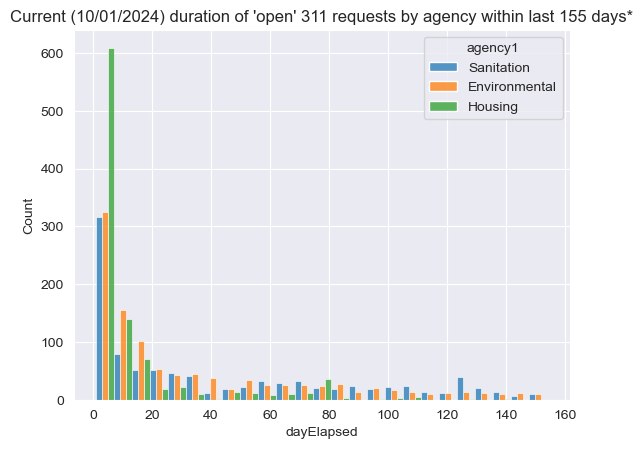

In [147]:
import seaborn as sns

sns.histplot(data=dt.query("agency1 in ['Sanitation','Housing','Environmental']"), x='dayElapsed', hue='agency1', multiple='dodge')
plt.title("Current (10/01/2024) duration of 'open' 311 requests by agency within last 155 days*")
plt.show()

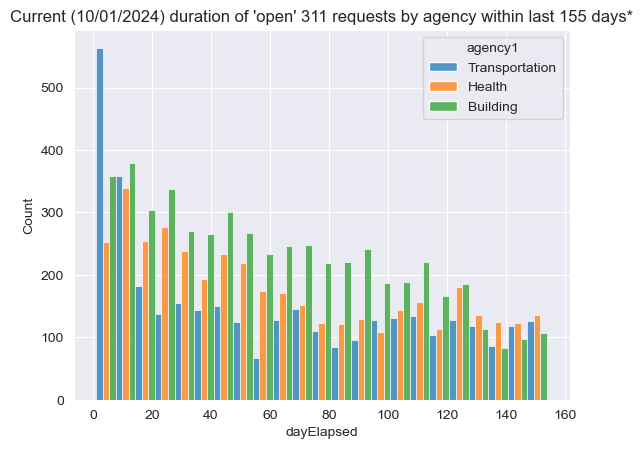

In [148]:
import seaborn as sns

sns.histplot(data=dt.query("agency1 in ['Building','Health','Transportation']"), x='dayElapsed', hue='agency1', multiple='dodge')
plt.title("Current (10/01/2024) duration of 'open' 311 requests by agency within last 155 days*")
plt.show()

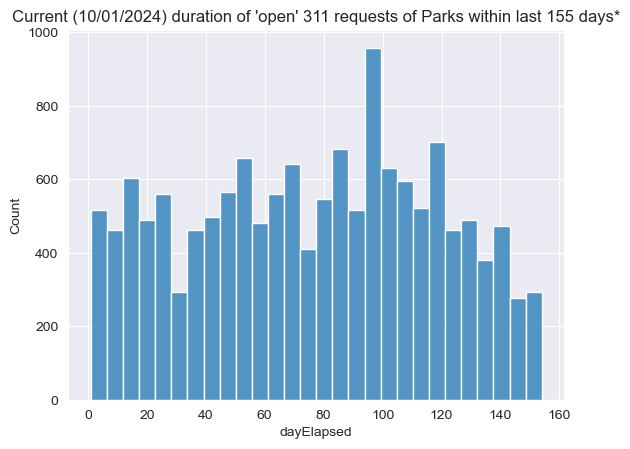

In [149]:
sns.histplot(data=dt.query("agency1 in ['Parks']"), x='dayElapsed', multiple='dodge')
plt.title("Current (10/01/2024) duration of 'open' 311 requests of Parks within last 155 days*")
plt.show()

In [156]:
# query parameter as a string
query = """
    SELECT 
        created_date,
        closed_date,
        agency,
        complaint_type,
        descriptor,
        location_type,
        incident_zip,
        incident_address,
        street_name, 
        cross_street_1,
        cross_street_2,
        address_type,
        city,
        status,
        due_date,
        resolution_description,
        resolution_action_updated_date,
        community_board,
        open_data_channel_type as open_data_type,
        vehicle_type,
        latitude,
        longitude,
        location
    WHERE
        created_date > '2024-05-01T00:00:00.000'
        AND agency IN ("DCWP","DHS","DOB","DOHMH","DOT","DPR","DSNY","DEP","HPD","NYPD")
    LIMIT
        600000
    """

# bqiq-cu78 is the data url for openData

url=f'https://data.cityofnewyork.us/resource/v7gg-i7xs.json?$query={query}'
data3= requests.get(url).json()
fi=pd.DataFrame(data3)
print(fi.shape)
fi.tail(5)





(367902, 23)


,incident_zip,descriptor,created_date,location,city,cross_street_2,latitude,open_data_type,incident_address,cross_street_1,...,longitude,complaint_type,street_name,status,address_type,resolution_action_updated_date,resolution_description,closed_date,vehicle_type,due_date
367897,11378,Commercial Overnight Parking,2024-05-01T00:07:17.000,"{'latitude': '40.721502273064004', 'human_addr...",MASPETH,60 AVENUE,40.721502273064004,PHONE,59-74 68 STREET,59 DRIVE,...,-73.89409120379891,Illegal Parking,68 STREET,Closed,ADDRESS,2024-05-01T03:55:26.000,The Police Department responded to the complai...,2024-05-01T03:55:22.000,NaN,NaN
367898,11385,Loud Music/Party,2024-05-01T00:04:48.000,"{'latitude': '40.70149461166943', 'human_addre...",NaN,SENECA AVENUE,40.70149461166943,PHONE,PUTNAM AVENUE,PUTNAM AVENUE,...,-73.90546554217497,Noise - Commercial,PUTNAM AVENUE,Closed,INTERSECTION,2024-05-01T00:42:54.000,The Police Department responded to the complai...,2024-05-01T00:42:51.000,NaN,NaN
367899,11421,No Access,2024-05-01T00:01:34.000,"{'latitude': '40.689908507178174', 'human_addr...",WOODHAVEN,88 ROAD,40.689908507178174,ONLINE,88-02 80 STREET,88 AVENUE,...,-73.8616377162125,Blocked Driveway,80 STREET,Closed,ADDRESS,2024-05-01T00:47:38.000,The Police Department issued a summons in resp...,2024-05-01T00:47:34.000,NaN,NaN
367900,11385,Banging/Pounding,2024-05-01T00:01:07.000,"{'latitude': '40.70500346596463', 'human_addre...",RIDGEWOOD,SENECA AVENUE,40.70500346596463,ONLINE,1711 HARMAN STREET,CYPRESS AVENUE,...,-73.91378488668434,Noise - Residential,HARMAN STREET,Closed,ADDRESS,2024-05-01T00:43:23.000,The Police Department responded to the complai...,2024-05-01T00:43:18.000,NaN,NaN
367901,11421,Banging/Pounding,2024-05-01T00:00:48.000,"{'latitude': '40.68805754694449', 'human_addre...",WOODHAVEN,87 STREET,40.68805754694449,PHONE,86-13 91 AVENUE,86 STREET,...,-73.85635543843172,Noise - Residential,91 AVENUE,Closed,ADDRESS,2024-05-01T00:39:31.000,The Police Department responded to the complai...,2024-05-01T00:39:27.000,NaN,NaN


In [157]:
fi2=fi.query('agency in ("DCWP","DHS","DOB","DOHMH","DOT","DPR","DSNY","DEP","HPD","NYPD")')
fi2.shape

(361277, 23)

In [160]:

def agent(x):
    if x=="DCWP":
        return "Consumer"
    elif x=="DHS":
        return "Homeless"
    elif x=="DOB":
        return "Building"
    elif x=="DOHMH":
        return "Health"
    elif x=="DOT":
        return "Transportation"
    elif x=="DPR":
        return "Parks"
    elif x=="DSNY":
        return "Sanitation"
    elif x=="DEP":
        return "Environmental"
    elif x=="HPD":
        return "Housing"
    elif x=="NYPD":
        return "Police"
    else:
        return x

fi2['agency1']= fi2.agency.apply(agent) #apply function
fi2.to_csv('311May_October.csv', index=False)


C:\Users\anaye\AppData\Local\Temp\ipykernel_39944\2655987538.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fi2['agency1']= fi2.agency.apply(agent) #apply function


In [162]:
fi2.agency

0         Police
1         Police
2         Police
3         Police
4          Parks
           ...  
367897    Police
367898    Police
367899    Police
367900    Police
367901    Police
Name: agency, Length: 361277, dtype: object

In [163]:
print(fi2.complaint_type.value_counts())
print(fi2.descriptor.value_counts())
print(fi2.resolution_description.value_counts())
print(fi2.status.value_counts())

#print(df3.city.value_counts())
#print(df3.community_board.value_counts())
#print(df3.location_type.value_counts())
#print(df3.open_data_type.value_counts())

complaint_type
Illegal Parking               64418
Noise - Residential           34286
Blocked Driveway              29316
Noise - Street/Sidewalk       14900
Abandoned Vehicle             12334
                              ...  
Building Marshals office          1
Cooling Tower                     1
Oil or Gas Spill                  1
Transfer Station Complaint        1
Calorie Labeling                  1
Name: count, Length: 152, dtype: int64
descriptor
Loud Music/Party                                     41263
No Access                                            20413
Blocked Hydrant                                      18429
Posted Parking Sign Violation                        14152
With License Plate                                   12334
                                                     ...  
Ped Visor                                                1
Office Supply or Stationery Store                        1
Clear Water With Organisms (Insects, Worms) (QE2)        1
Glasswar

In [167]:
fi2.location_type.value_counts()
fi2.community_board.value_counts()

community_board
12 QUEENS             35065
05 QUEENS             33967
01 QUEENS             33511
08 QUEENS             32029
07 QUEENS             31757
09 QUEENS             26104
10 QUEENS             25627
03 QUEENS             24268
13 QUEENS             23279
02 QUEENS             22961
04 QUEENS             20476
14 QUEENS             16234
06 QUEENS             15533
11 QUEENS             14181
Unspecified QUEENS     4897
81 QUEENS              1013
82 QUEENS               291
83 QUEENS                41
84 QUEENS                32
80 QUEENS                11
Name: count, dtype: int64

In [166]:
fi2.open_data_type.value_counts()


open_data_type
ONLINE     143169
PHONE      116666
MOBILE      70077
UNKNOWN     31365
Name: count, dtype: int64

In [ ]:
d['index']=1
p=['agency','index']
pc1= df7[p].groupby(['agency']).sum().reset_index()
pc1= pc1.rename(columns={"index": "5month_Tot"})

